<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/6_2_Gradient_Based_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Feedforward Networks: 6.2 Gradient based Learning**
- What is Non-Linearity and Non-convexity?
- (Non-Linear) Activation functions
- Cost functions 
  - cross entropy loss
  - model output zero or one (for descrete output probability) will cause cross entropy loss to be infinite or negative infinite
  - function saturates implies gradient small

###imports

In [35]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [5]:
%matplotlib inline

###Utility functions

In [11]:
def plot_function(function_f, range = torch.linspace(-1,1,50),**kwargs):
  fig = plt.figure(**kwargs)
  y = function_f(range)
  plt.scatter(range,y)


## Non-Linearity and Nonconvexity

Convex sets(left) vs Non Convex sets(right)
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Convex_polygon_illustration1.svg/220px-Convex_polygon_illustration1.svg.png'>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Convex_polygon_illustration2.svg/220px-Convex_polygon_illustration2.svg.png'>

Let S be a vector space over the real numbers. A subset C of S is convex if, for all $x$ and $y$ in $C$, the line segment connecting $x$ and $y$ is included in C. This means that the affine combination $(1 − t)x + ty$ belongs to C, for all x and y in C, and t in the interval [0, 1]. 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Convex_vs._Not-convex.jpg/300px-Convex_vs._Not-convex.jpg'>

let $f:X\to \mathbb {R}$ be a function. 
Then $f$ is called convex if and only if any of the following equivalent conditions hold:

For all $0\leq t\leq 1$ and all $x_{1},x_{2}\in X$:

$f\left(tx_{1}+(1-t)x_{2}\right)\leq tf\left(x_{1}\right)+(1-t)f\left(x_{2}\right)$

In mathematics, a linear map (or linear function) $f(x)$ is one which satisfies both of the following properties:

Additivity or superposition principle: $f ( x + y ) = f ( x ) + f ( y )$

Homogeneity: $f ( α x ) = α f ( x )$

###iterative, gradient-based optimizers
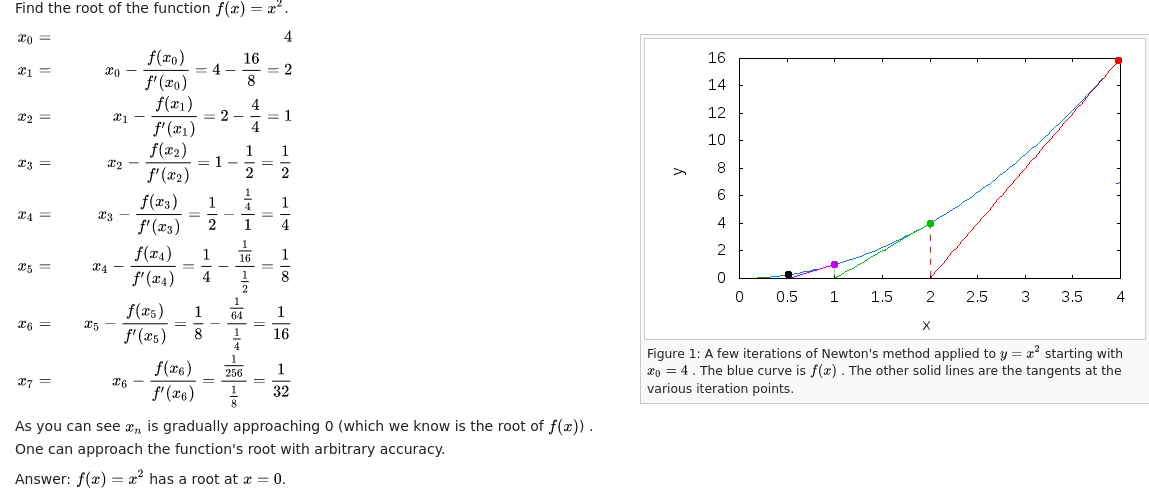

##(Non-Linear)Activation functions

Text(0.5, 1.0, 'tanh')

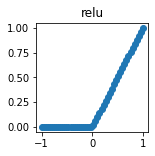

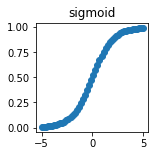

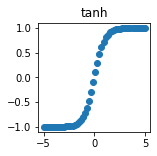

In [81]:
activation = nn.ReLU()
plot_function(activation,figsize=(2,2))
plt.title('relu')

activation = nn.Sigmoid()
plot_function(activation,range=torch.linspace(-5,5,50),figsize=(2,2))
plt.title('sigmoid')

activation = nn.Tanh()
plot_function(activation,range=torch.linspace(-5,5,50),figsize=(2,2))
plt.title('tanh')

## Cost functions

**Cross-Entropy**

Cross Entropy is defined as follows:
$n​=−[y_n​⋅logx_n​+(1−y_n​)⋅log(1−x_n​)]$

where $x_n$ and $y_n$ are inputs to the cross-entropy function.

*Shows how cross-entropy acts as a loss(cost) function*
- loss functions return large value when prediction and groundtruth **aren't** similar
- loss functions return small value when prediction and groundtruth **are** similar

In [77]:
# we will use the cross-entropy loss function defined by the pytorch framework
loss = nn.BCELoss() # Binary Cross Entropy loss

groundtruth = torch.tensor([1.0],dtype=torch.float)
predicted_good = torch.tensor([0.99],dtype=torch.float)
predicted_bad = torch.tensor([0.001],dtype=torch.float)

for predicted in [predicted_good, predicted_bad]:
  output = loss(predicted, groundtruth)
  print(f'y_pred = {predicted.item():.3f} y_groundtruth = {groundtruth.item():.3f} Cross Entropy Loss {output:.3f}')

y_pred = 0.990 y_groundtruth = 1.000 Cross Entropy Loss 0.010
y_pred = 0.001 y_groundtruth = 1.000 Cross Entropy Loss 6.908


Frameworks may provide different versions of the Cross-Entropy loss. It is important to look at the documentation which ones fit in our case.
In pytorch, these different versions specialize for multi-class classification vs binary classification case and when the values occur as unnormalized probabilities (logits).

https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

*we now implement our own binary cross entropy loss function*

$n​=−[y_n​⋅logx_n​+(1−y_n​)⋅log(1−x_n​)]$

In [76]:
def my_BCELoss(predicted, groundtruth):
  """assume the input is a binary probability value"""
  return -1.0  * (groundtruth * torch.log(predicted) + (1.0 - groundtruth) * torch.log(1.0 - predicted))

In [45]:
for predicted in [predicted_good, predicted_bad]:
  output = my_BCELoss(predicted, groundtruth)
  print(f'y_pred = {predicted.item():.3f} y_groundtruth = {groundtruth.item():.3f} Cross Entropy Loss {output.item():.3f}')

y_pred = 0.990 y_groundtruth = 1.000 Cross Entropy Loss 0.010
y_pred = 0.001 y_groundtruth = 1.000 Cross Entropy Loss 6.908


*Lets plot the cross-entropy loss function where groundtruth = 1.0 and y_pred increases from 0.0 to 1.0. We should see that the cross-entropy value decreases.*

Text(0, 0.5, 'cross-entropy loss')

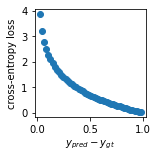

In [75]:
y_preds = torch.linspace(0.0,1.0,steps=50)
y_groundtruth = torch.tensor([1.0])
loss_value = my_BCELoss(y_preds,y_groundtruth)
fig = plt.figure(figsize=(2,2))
plt.scatter(y_preds.numpy(),loss_value)
plt.xlabel('$y_{pred}-y_{gt}$',)
plt.ylabel('cross-entropy loss')


*One unusual property of the cross-entropy cost used to perform maximum
likelihood estimation is that it usually does not have a minimum value when applied to the models commonly used in practice. 
For discrete output variables, most models are parametrized in such a way that they cannot represent a probability of zero or one, but can come arbitrarily close to doing so.*

In [83]:
groundtruth = torch.tensor([1.0],dtype=torch.float)
predicted_extreme_good = torch.tensor([1.0],dtype=torch.float)
predicted_extreme_bad = torch.tensor([0.000],dtype=torch.float)
for predicted in [predicted_extreme_good, predicted_extreme_bad]:
  output = my_BCELoss(predicted, groundtruth)
  print(f'y_pred = {predicted.item():.3f} y_groundtruth = {groundtruth.item():.3f} Cross Entropy Loss {output.item():.3f}')

y_pred = 1.000 y_groundtruth = 1.000 Cross Entropy Loss nan
y_pred = 0.000 y_groundtruth = 1.000 Cross Entropy Loss inf


*As seen above, if the model predicts either zero or one, cross entropy loss will be infinity or negative infinity(represented by nan(not-a-number due to floating point overflow).* 

*As a function saturates (starts to become flat), the gradient starts to become small (as shown in the figure below). Having a small gradient does not serve as a good guide for the learning algorithm.*


Sigmoid function $\sigma(x) = \frac{1}{1 + \exp(x)}$

In [82]:
def my_sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def gradient_of_sigmoid(x):
  return my_sigmoid(x) * (1.0 - my_sigmoid(x)) # where did this formula come from?
  

[Derivation for gradient of sigmoid](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x)

Text(0.5, 1.0, 'our custom sigmoid gradient plot for x in [-5,5]')

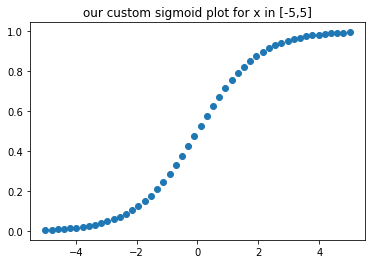

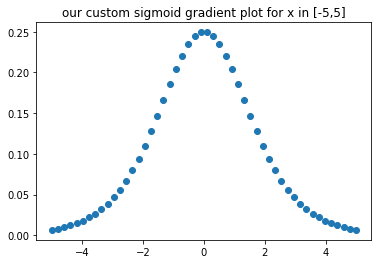

In [71]:
# most models have either sigmoid(for binary classification) or softmax(for multi-class classification) at the output layer
# we will see what the sigmoid function looks like.
# This will help us understand why models cannot represent a probability of zero or one.
plot_function(function_f=my_sigmoid,range=torch.linspace(-5,5,50))
plt.title('our custom sigmoid plot for x in [-5,5]')

plot_function(function_f=gradient_of_sigmoid,range=torch.linspace(-5,5,50))
plt.title('our custom sigmoid gradient plot for x in [-5,5]')

# we can see that the sigmoid function squashes the input range into [0,1]
# this function can be useful in modelling probabilities